---
title: "Лабораторна робота № 1 (Попередня обробка  зображень)"
author: "Григораш Назарій"
format:
  html:
    code-fold: true
    html-math-method: katex
  pdf:
    geometry:
        - top=30mm
        - left=20mm
  docx: default
  beamer: default
  revealjs:
    incremental: true
toc: true
theme: Madrid
number-sections: true
#highlight-style: pygments
jupyter: python3
execute:
    error: false
    warning: false
fig-align: center
---

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Pictures upload

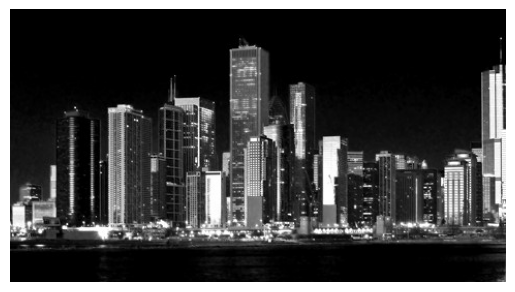

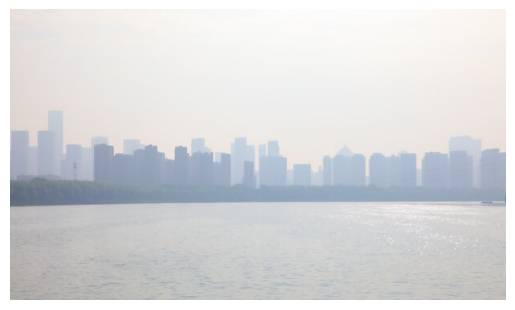

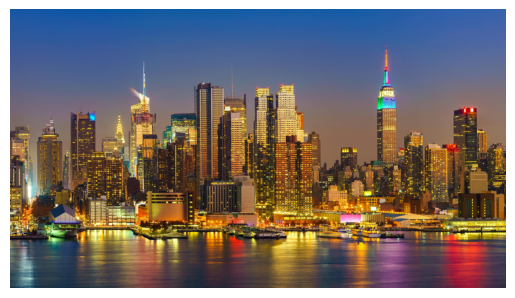

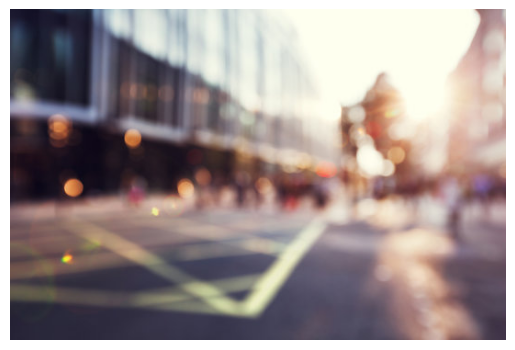

In [12]:
image_paths = ['images/contrast1.jpg', 'images/contrast2.jpg', 'images/detailed1.jpeg', 'images/detailed2.jpg']
images = [Image.open(path) for path in image_paths]

for img in images:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Histogram moves

In [13]:
def histogram_left(img, shift_value):
    image_array = np.array(img).astype(np.int16)
    shifted_image_array = np.clip(image_array - shift_value, 0, 255).astype(np.uint8)

    return Image.fromarray(shifted_image_array)

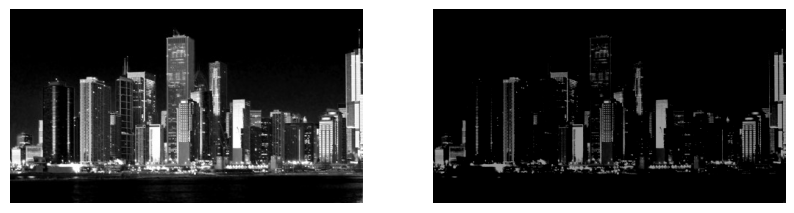

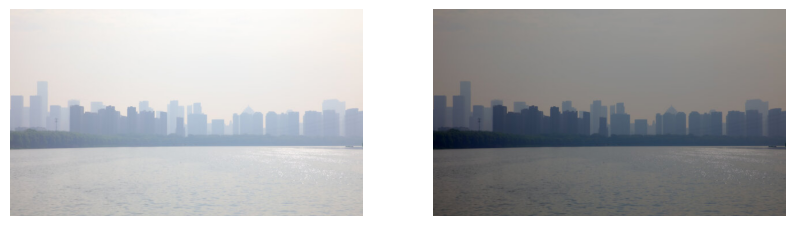

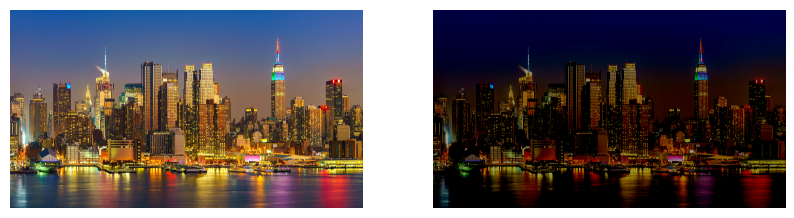

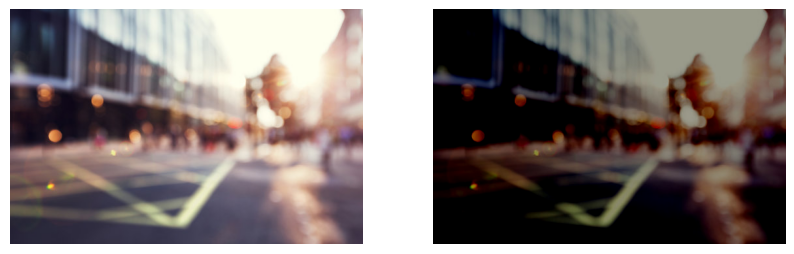

In [14]:
for i, image in enumerate(images):
    
    shifted_image = histogram_left(image, 100)
    shifted_output_path = f"images/shifted_{i + 1}.png"
    shifted_image.save(shifted_output_path)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(shifted_image)
    plt.axis('off')
    plt.show()

Results analyse

In [15]:
def show_histogram_difference(img1, img2):
    # Open the images and convert them to numpy arrays
    img1_data = np.array(Image.open(img1).convert('L'))
    img2_data = np.array(Image.open(img2).convert('L'))

    # Calculate histograms
    hist1 = np.bincount(img1_data.ravel(), minlength=256)
    hist2 = np.bincount(img2_data.ravel(), minlength=256)

    # Compute the absolute difference of the two histograms
    hist_diff = np.abs(hist1 - hist2)

    fig, axs = plt.subplots(3, 1, figsize=(10,15))

    # Plot histogram of first image
    axs[0].bar(range(256), hist1, color='b')
    axs[0].set_title('Image1 Histogram')
    axs[0].set_xlabel('Pixel Intensity')
    axs[0].set_ylabel('Pixel Frequency')

    # Plot histogram of second image
    axs[1].bar(range(256), hist2, color='b')
    axs[1].set_title('Image2 Histogram')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Pixel Frequency')

    # Plot histogram of difference
    axs[2].bar(range(256), hist_diff, color='b')
    axs[2].set_title('Difference in Image Histograms')
    axs[2].set_xlabel('Pixel Intensity')
    axs[2].set_ylabel('Difference in Pixel Frequency')

    plt.tight_layout()
    plt.show()

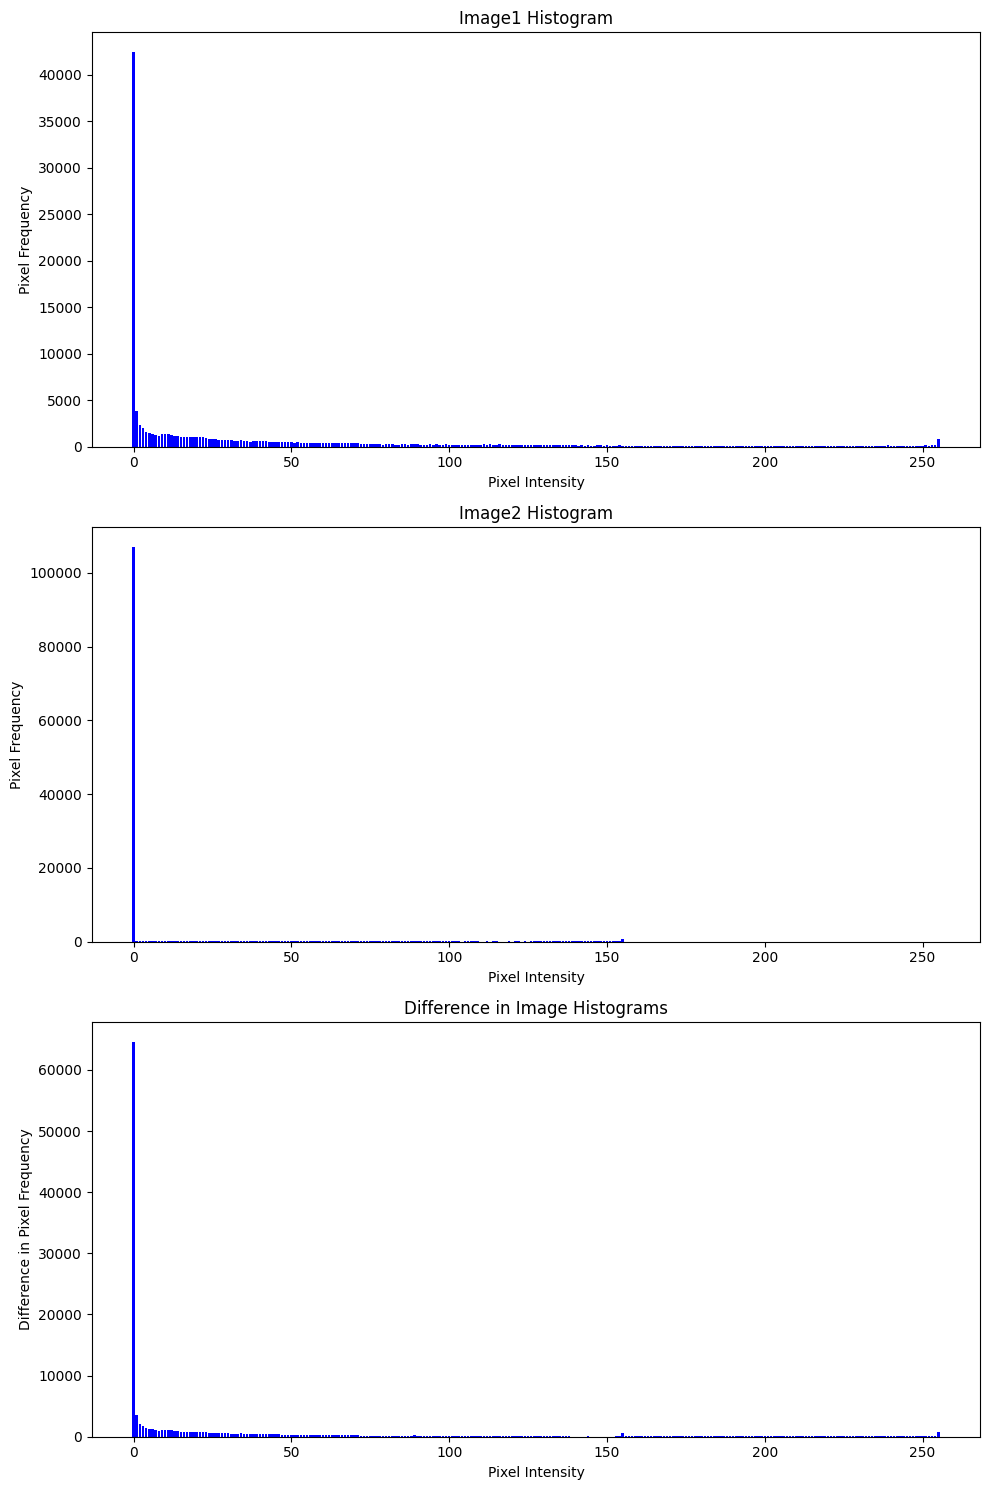

In [16]:
show_histogram_difference(image_paths[0], 'images/shifted_1.png')

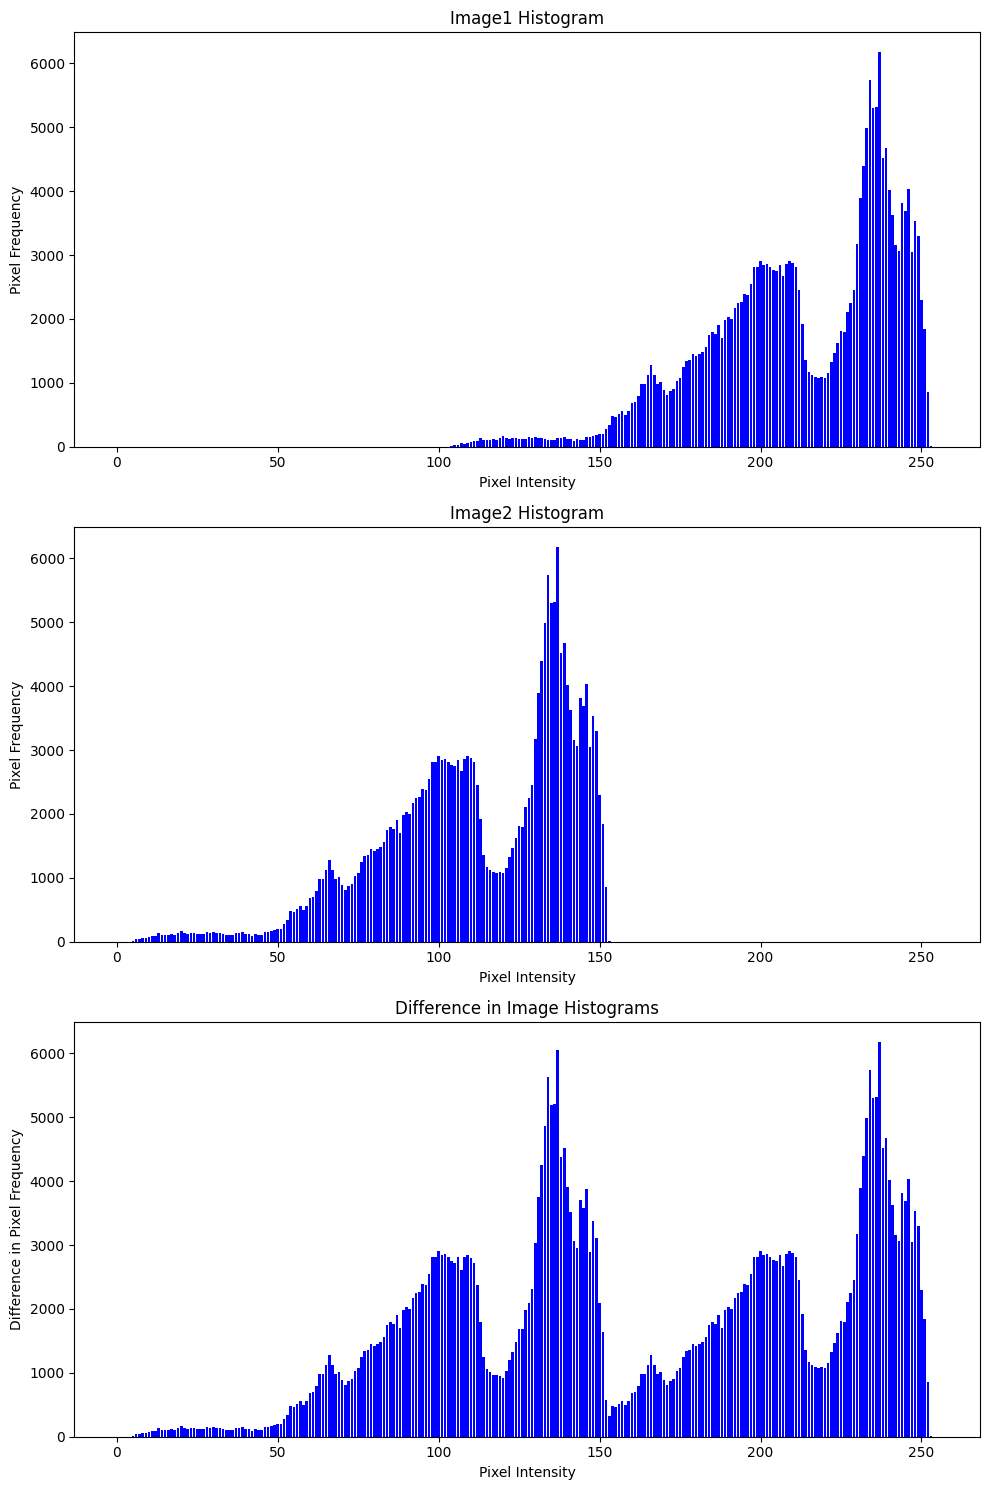

In [19]:
show_histogram_difference(image_paths[1], 'images/shifted_2.png')

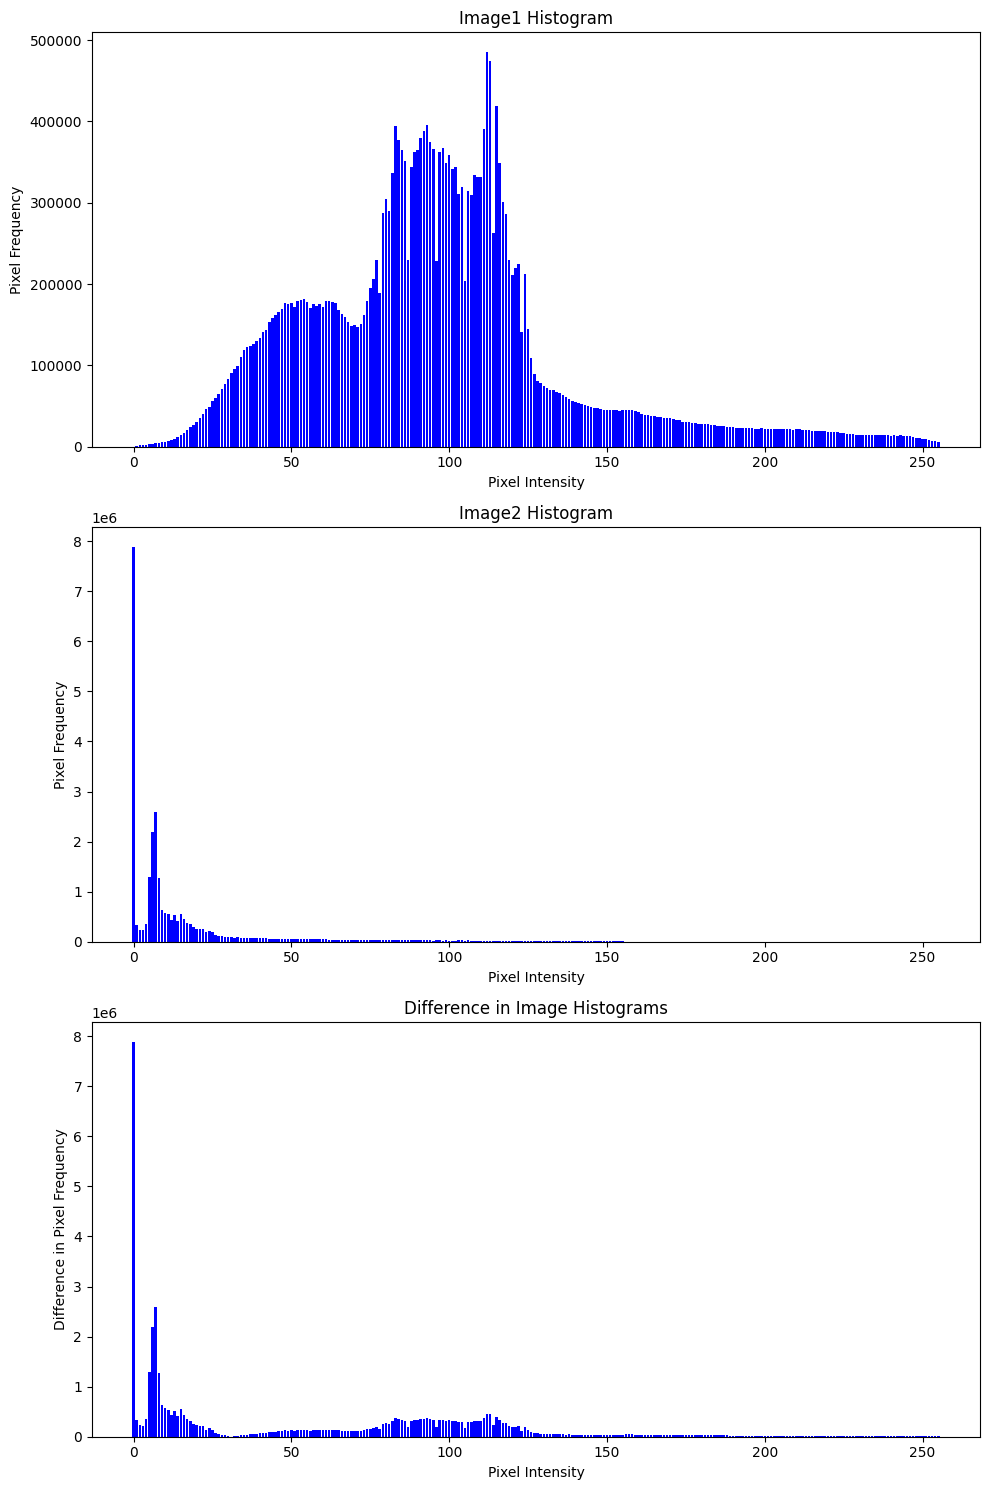

In [17]:
show_histogram_difference(image_paths[2], 'images/shifted_3.png')

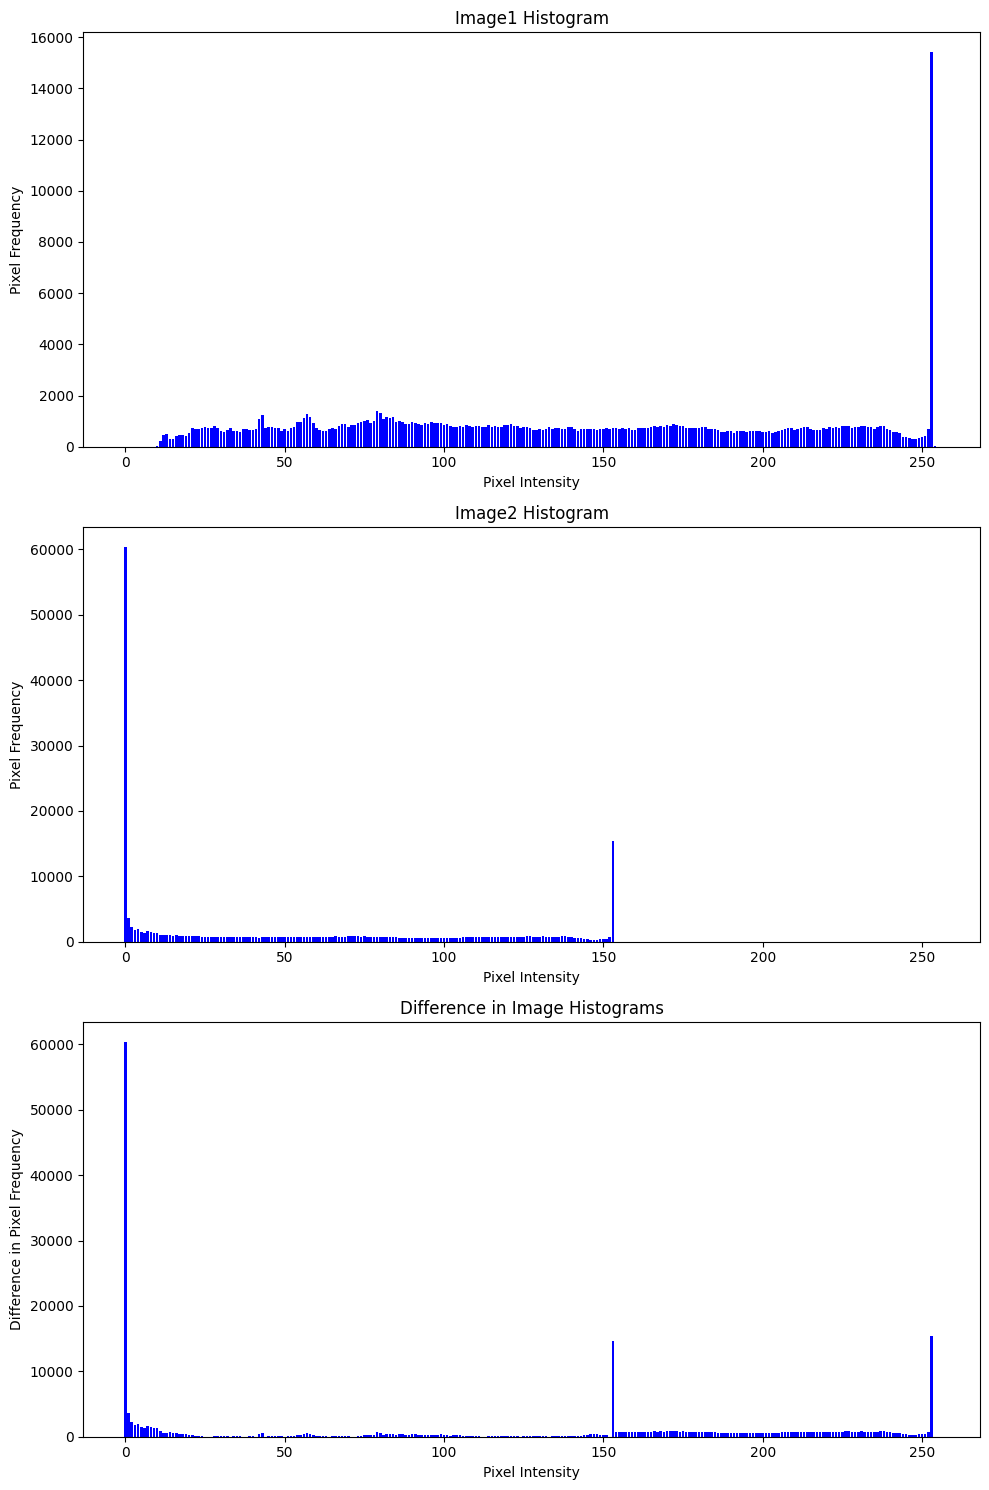

In [18]:
show_histogram_difference(image_paths[3], 'images/shifted_4.png')